#시각화 연습
1. 준비 
    !pip install pandas
    !pip install seaborn
    !pip install jupyterlab
    !pip install scikit-learn
2. 주의사항
    -한 셀에 3개이상 겹치지 않기
    -선색상 원색 쓰기
3. 참고(버전)
    -python == 3.12.x
    -matplotlib == ...


In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_iris

In [ ]:
iris = load_iris()
iris.keys()
# target_names 종속변인 : 꽃의 품종
# feature_names 독립변인 : 꽃 받침 길이,너비,꽃잎길이 ...

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [65]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [ ]:
df = pd.DataFrame(X, columns = feature_names)
df["species"] = [str(iris.target_names[i]) for i in y]
df.head(3)
# df.tail(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [75]:
means = df.groupby("species").mean()
colors =["red", "blue", "green"]
species_list = iris.target_names

means

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


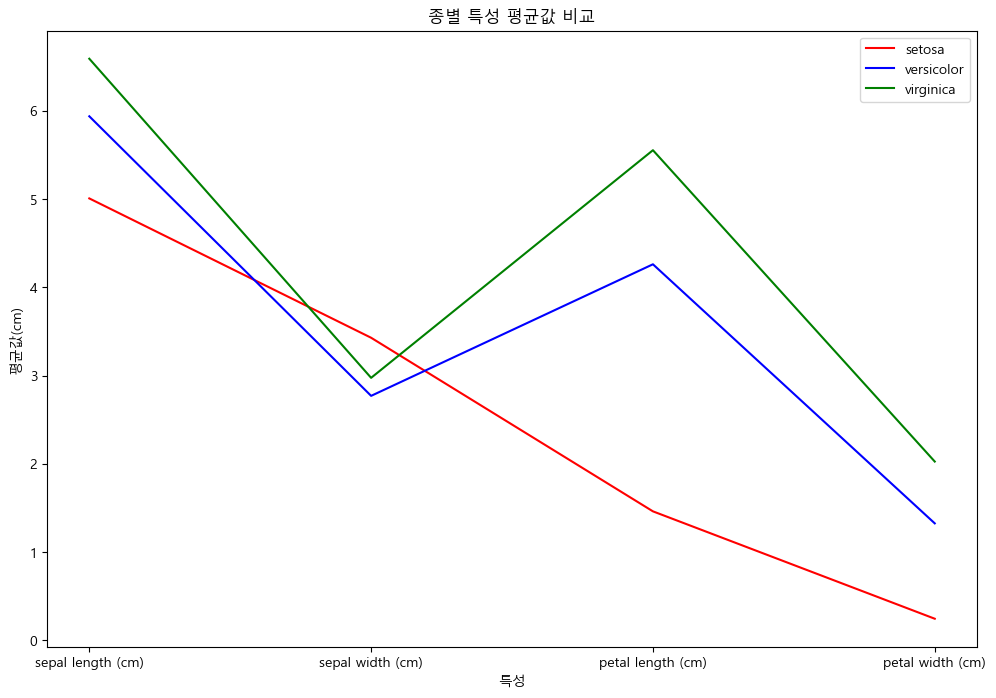

In [80]:
plt.figure(figsize = (12,8)) #크기
# 직접그려보기
# plt.plot(X, y)
for i, species in enumerate(species_list):
    plt.plot(iris.feature_names, means.loc[species],
            color = colors[i], label= species)

plt.title("종별 특성 평균값 비교")
plt.xlabel("특성")
plt.ylabel("평균값(cm)")
plt.legend() #범례
plt.show()

In [61]:
# petal length (cm) 가 1.5보다 큰 데이터를 출력해보자!
# boolean data frame =>  필터링
df["petal length (cm)"] > 1.5
# 실제데이터
df_petal = df[df["petal length (cm)"] > 1.5] 

<Axes: >

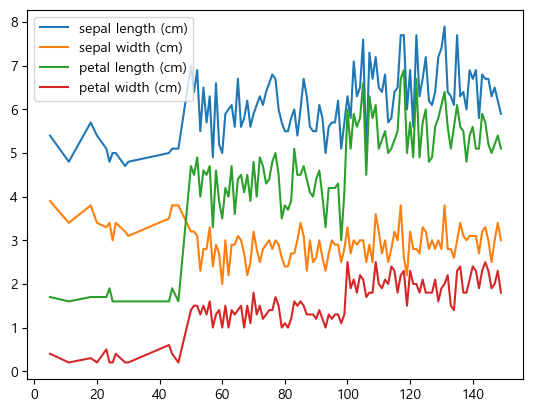

In [ ]:
df_petal.plot()

Text(0, 0.5, '관측 데이터')

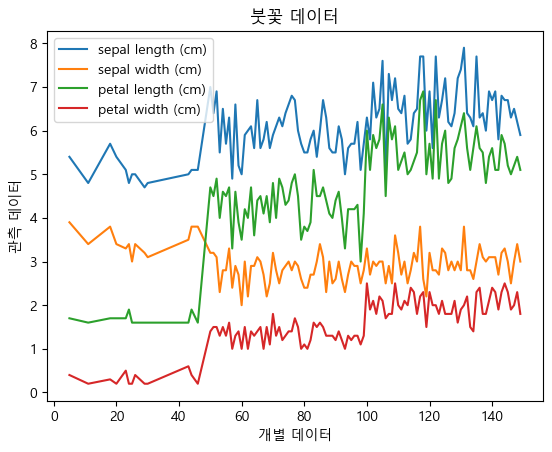

In [64]:
ax =df_petal.plot()
ax.set_title("붓꽃 데이터")
ax.set_xlabel("개별 데이터")
ax.set_ylabel("관측 데이터")

In [35]:
# 한국어폰트
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
!pip install pandas

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [3]:
!pip install seaborn

     -------------------------------------- 294.9/294.9 KB 6.1 MB/s eta 0:00:00


You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install jupyterlab

     --------------------------------------- 12.3/12.3 MB 24.2 MB/s eta 0:00:00
     ---------------------------------------- 73.5/73.5 KB ? eta 0:00:00
     ---------------------------------------- 69.4/69.4 KB 3.9 MB/s eta 0:00:00
     ------------------------------------- 386.9/386.9 KB 23.5 MB/s eta 0:00:00
     ---------------------------------------- 59.7/59.7 KB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 162.7/162.7 KB ? eta 0:00:00
     ---------------------------------------- 78.8/78.8 KB ? eta 0:00:00
     ---------------------------------------- 70.4/70.4 KB ? eta 0:00:00
     -------------------------------------- 100.9/100.9 KB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 58.7/58.7 KB ? eta 0:00:00
     ---------------------------------------- 58.8/58.8 KB ? eta 0:00:00
     ------------------------------------- 258.5/258.5 KB 16.6 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 45.0 MB/s eta 0:00:00
 

You should consider upgrading via the 'C:\Users\user\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


(100,)
10.0


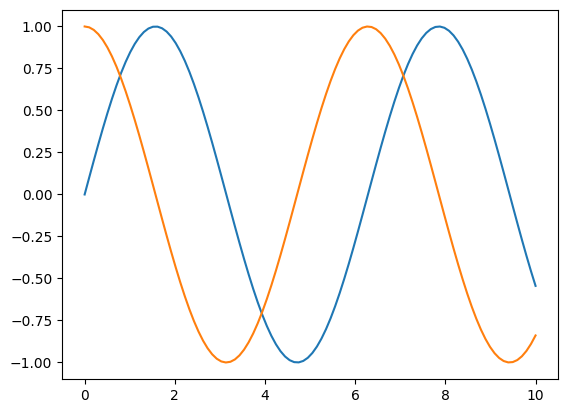

<Figure size 640x480 with 0 Axes>

In [14]:
x = np.linspace(0,10,100)
print(x.shape)
print(x[99]) 

# 한 셀에 작성하면 겹쳐 그림
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));
plt.show() #(배포시)py파일로 열때, plt.show 없으면 그래프 안뜸, but 쥬피터노트북에서는 안해도됨.
plt.savefig("sample.pdf")

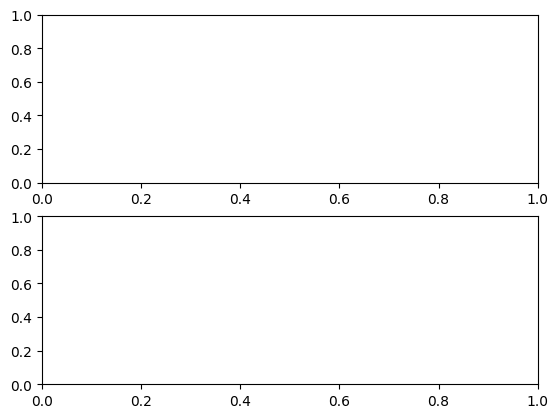

In [ ]:
# fig 하나 ax 둘
fig, ax = plt.subplots(2)

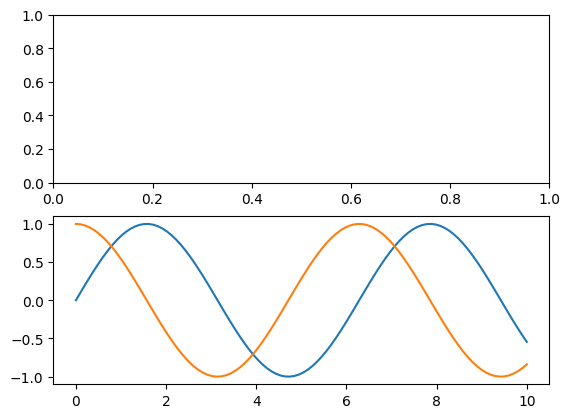

In [16]:
fig, ax = plt.subplots(2)
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x));

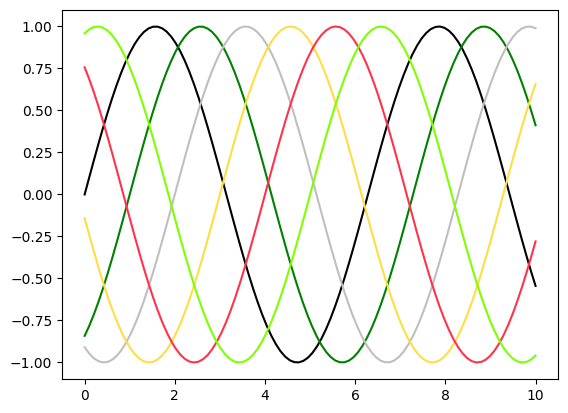

In [ ]:
# 색상
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x-0), color="black")
plt.plot(x, np.sin(x-1), color ="g")
plt.plot(x, np.sin(x-2), color="0.75") #그라데이션
plt.plot(x, np.sin(x-3), color="#FFDD44")
plt.plot(x, np.sin(x-4), color=(1.0,0.2,0.3))
plt.plot(x, np.sin(x-5), color="chartreuse");

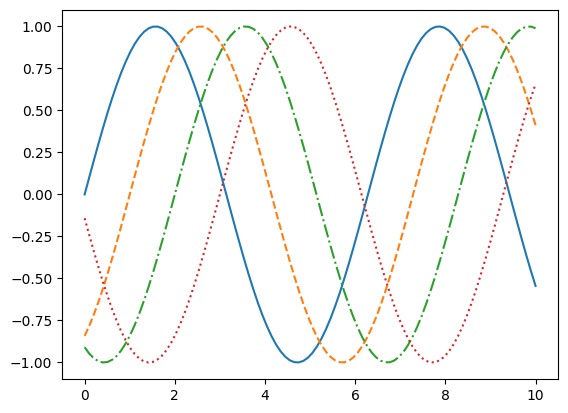

In [28]:
# 선스타일
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x-0), linestyle="solid")
plt.plot(x, np.sin(x-1), linestyle="dashed")
plt.plot(x, np.sin(x-2), linestyle="dashdot")
plt.plot(x, np.sin(x-3), linestyle="dotted");

In [ ]:
# 선스타일
x = np.linspace(0,10,100)
plt.plot(x, np.sin(x-0), "-g")
plt.plot(x, np.sin(x-1), "- -c")
plt.plot(x, np.sin(x-2), "-.k")
plt.plot(x, np.sin(x-3), ":r");

Text(0, 0.5, '$sin(x)$')

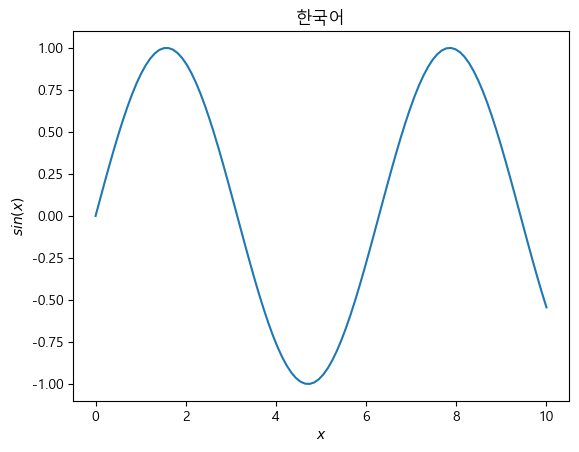

In [36]:
plt.plot(x, np.sin(x))
plt.title("한국어")
plt.xlabel("$x$")
plt.ylabel("$sin(x)$")
# plt.xlim(0, 10)
# plt.ylim(0, 0.4);